In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import html5lib
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [27]:
def eval_con_mat(matrix):
    #use confusion matrix to compute accuracy (good calls divided by all calls made)
    print('Accuracy of {}%'.format(round(100*
                                         (matrix[1][1]+matrix[0][0])/
                                         (matrix[1][0]+matrix[0][1]+matrix[1][1]+matrix[0][0])),2))
    

    print('Sensitivity of {}%'.format(round(100*matrix[1][1]/(matrix[1][1] + matrix[1][0]),2)))
    print('Specificity of {}%'.format(round(100*matrix[0][0]/(matrix[0][0] + matrix[0][1]),2)))
    

In [28]:
#Read in a list of 2000+ positive words
pos_words_loc = ('https://github.com/gurkpet/Thinkful-Lessons/blob/master/'
             'Thinkful%202.2.7-Naive%20Bayes/Word%20Lists/positive-words.txt')
pos_words_list = pd.read_html(pos_words_loc, skiprows=35)

#clean up the read in by removing the first column of junk data
for row in pos_words_list:
   del row[0]    

#convert list into dataframe
pos_words = pd.DataFrame(pos_words_list[0])

In [29]:
list_pos_words = list(pos_words[1])

In [30]:
#read in amazon file
amzn_file_loc = ('https://raw.githubusercontent.com/gurkpet/Thinkful-Lessons/master/'
            'Thinkful%202.2.7-Naive%20Bayes/amazon_cells_labelled.txt')

df = pd.read_csv(amzn_file_loc, delimiter= '\t', header=None)
#rename column headers
amzn_dat = df.copy()
amzn_dat.columns = ['review', 'positive_review']
amzn_target = amzn_dat['positive_review']

In [31]:
for key in list_pos_words:
    amzn_dat[str(key)] = amzn_dat.review.str.contains(str(key), case = False)
amzn_dat['positive_review'] = (amzn_dat['positive_review'] == 1)
data_amzn = amzn_dat[list_pos_words]
amzn_target = amzn_dat['positive_review']

In [32]:
X=data_amzn.values

In [33]:
data_amzn.shape

(1000, 2006)

In [34]:
#Scaling the values
X = scale(X)

pca = PCA(n_components=2006) # all features

pca.fit(X)

c:\users\peter\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype bool was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


PCA(copy=True, iterated_power='auto', n_components=2006, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

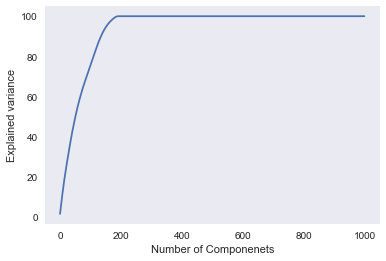

In [35]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
plt.xlabel('Number of Componenets')
plt.ylabel('Explained variance')
plt.grid()
plt.show()

In [36]:

X = scale(X)

pca = PCA(n_components=180) # all features

pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=180, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

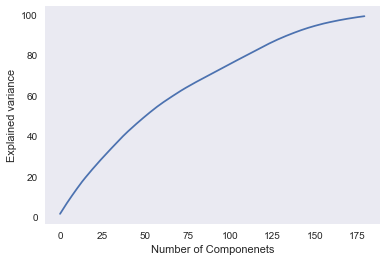

In [37]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
plt.xlabel('Number of Componenets')
plt.ylabel('Explained variance')
plt.grid()
plt.show()

In [38]:
data_importance = pd.DataFrame()

In [39]:
bnb = BernoulliNB()
skf = KFold(n_splits=5)
x= 0
data_amzn
for train, test in skf.split(data_amzn):
    x = x+1
    fold = data_amzn.ix[train]
    keep = data_amzn.ix[test]
    targ = amzn_target.ix[train]
    bnb = bnb.fit(data_amzn, amzn_target)
    pred = bnb.predict(keep)
    con_mat = confusion_matrix(amzn_target.ix[test],pred)
    print('\nIteration no. {} results'.format(x))
    eval_con_mat(con_mat)


Iteration no. 1 results
Accuracy of 88.0%
Sensitivity of 82.18%
Specificity of 93.94%

Iteration no. 2 results
Accuracy of 84.0%
Sensitivity of 79.09%
Specificity of 88.89%

Iteration no. 3 results
Accuracy of 80.0%
Sensitivity of 73.27%
Specificity of 86.87%

Iteration no. 4 results
Accuracy of 82.0%
Sensitivity of 72.16%
Specificity of 90.29%

Iteration no. 5 results
Accuracy of 84.0%
Sensitivity of 71.43%
Specificity of 94.5%


In [72]:
i = np.identity(data_amzn.shape[1]) 
num_pc= 4
pca = PCA(n_components=num_pc)
pca.fit(X)
coef = pca.transform(i)
pc_list = []

for x in range(num_pc):
    pc_list.append(x)

In [98]:
value_of_feature = pd.DataFrame(coef, columns=[pc_list], index=data_amzn.columns)

value_of_feature[0].values.max()

0.43951904005095077

In [77]:
value_of_feature.values.min()

-0.29365031893317017

In [99]:
value_of_feature.sort([0], ascending = False)

c:\users\peter\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,0,1,2,3
fav,0.439519,-0.223702,0.231220,0.156622
favorite,0.439519,-0.223702,0.231220,0.156622
favor,0.439519,-0.223702,0.231220,0.156622
fortunate,0.049283,0.005167,-0.072323,0.009664
fortunately,0.049283,0.005167,-0.072323,0.009664
respect,0.035542,0.004894,-0.050538,0.005233
excite,0.034397,0.038334,-0.034892,0.068512
excited,0.034397,0.038334,-0.034892,0.068512
cute,0.030270,0.033905,-0.028038,0.062410
gentle,0.029155,0.001974,-0.042225,0.007906


<h5>Is any of the data overfit?:</h5>
    Based on the similarities between our five iteriations it doesn't seem that our model is overfitting.

<h5>Which seem to perform the best? Why?:</h5>
    Iteration number 1 seems have have the best performance.  This is likely due to the skewness between the folds, where the data is more balanced between positive and negative reviews for the Training data for Iteration 1 than the rest of the iterations.  
    
<h5>What features seemed to be most impactful to performance?:</h5>
    It seems the words 'fav', 'favorite' and 'favor' had the most variance and thus were the strongest predictive features.